## Importação da base de dados

In [1]:
import pandas as pd

df = pd.read_csv('credito.csv',sep=',', na_values='na')
display(df)


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


## Avaliação geral dos dados

1. Avaliação de linhas totais, inadimplentes, adimplentes
2. Tipo de dados
3. Descrição do tipo de dados categóricos.
4. Descrição do tipo de dados numéricos.
5. Verificar existência de valores ausentes por coluna
6. Verificar quantidade de valores ausentes por coluna
7. Verificar quantas linhas contém a combinação de 2 ou 3 valores ausentes
8. Verificar volume dos dados por categoria

1. Avaliação de linhas totais, inadimplentes, adimplentes

In [17]:
linhas_colunas_totais = df.shape
n_inadimplentes = df[df['default'] == 0].shape
n_adimplentes = df[df['default']==1].shape
print(linhas_colunas_totais)
print(n_inadimplentes)
print(n_adimplentes)

(10127, 16)
(8500, 16)
(1627, 16)


2. Tipo de dados

In [21]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

3. Descrição do tipo de dados categóricos

In [23]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


4. Descrição do tipo de dados numéricos

In [25]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


5. Verificar existência de valores ausentes por coluna

In [27]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

6. Verificar quantidade de valores ausentes por coluna

In [29]:
df.isnull().sum()    

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

7. Verificar quantas linhas contém a combinação de 2 ou 3 valores ausentes

In [222]:
dfc = df.copy()

# coluna booleana com 2 ou 3 dados faltantes
dfc['faltantes'] = (dfc[['escolaridade', 'estado_civil', 'salario_anual']].isna().sum(axis=1) >= 2)

# total de linhas que atendem a condição
print(dfc['faltantes'].sum())

327


8. Verificar volume dos dados por categoria

In [98]:
# dados por sexo

df_sexo_contagem = df['sexo'].value_counts().reset_index()
df_sexo_contagem.columns = ['sexo', 'count']
display(df_sexo_contagem)

,sexo,count
0,F,5096
1,M,4704


In [100]:
# dados de estado civil por sexo

contagem1 = pd.crosstab(df['estado_civil'], df['sexo'])
display(contagem1)

sexo,F,M
estado_civil,,
casado,2394,2235
divorciado,393,345
solteiro,2058,1815


In [102]:
# dados de escolaridade por sexo

contagem2 = pd.crosstab(df['escolaridade'], df['sexo'])
display(contagem2)

sexo,F,M
escolaridade,,
doutorado,511,446
ensino medio,1009,985
graduacao,519,481
mestrado,1648,1458
sem educacao formal,786,690


In [194]:
# dados de dependentes por sexo

df_dependentes_sexo = df.groupby(['dependentes', 'sexo']).size().reset_index(name='quantidade')
display(df_dependentes_sexo)

,dependentes,sexo,quantidade
0,0,F,484
1,0,M,420
2,1,F,996
3,1,M,842
4,2,F,1388
5,2,M,1267
6,3,F,1416
7,3,M,1316
8,4,F,849
9,4,M,725


In [120]:
# dados de faixa-etária por sexo 

bins = [18, 25, 35, 45, 60, 100]  # define os limites das faixas
labels = ['18-25', '26-35', '36-45', '46-60', '60+']  # rótulos

df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=False) # right=False inclui o limite inferior, mas não o superior

df_idade_sexo = df.groupby(['faixa_etaria', 'sexo']).size().reset_index(name='count')
display(df_idade_sexo)

C:\Users\HOME\AppData\Local\Temp\ipykernel_13632\2091388626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_idade_sexo = df.groupby(['faixa_idade', 'sexo']).size().reset_index(name='count')


,faixa_idade,sexo,count
0,18-25,F,0
1,18-25,M,0
2,26-35,F,346
3,26-35,M,362
4,36-45,F,1714
5,36-45,M,1609
6,46-60,F,2767
7,46-60,M,2484
8,60+,F,269
9,60+,M,249


In [186]:
# dados de salário anual por sexo

lista_valores = df['salario_anual'].unique().tolist()
print(lista_valores)

['$60K - $80K', 'menos que $40K', '$80K - $120K', '$40K - $60K', '$120K +', nan]


In [190]:
ordem_salario = ['menos que $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

df['salario_anual'] = pd.Categorical(df['salario_anual'], categories=ordem_salario, ordered=True)

contagem3 = pd.crosstab(df['salario_anual'], df['sexo'])
display(contagem3)

sexo,F,M
salario_anual,,
menos que $40K,3284,277
$40K - $60K,1014,776
$60K - $80K,0,1402
$80K - $120K,0,1535
$120K +,0,727


## Tratamento de dados

1. Formatar moeda brasileira para moeda americana
2. Excluir dados ausentes apenas de linhas que contenham 2 ou 3 dados ausentes na mesma linha
3. Encoding
4. Excluir colunas consideradas desnecessárias

   

1. Formatar moeda brasileira para moeda americana

In [3]:
sub = lambda valor: float(valor.replace(".", "").replace(",", "."))

In [5]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(sub)
df['limite_credito'] = df['limite_credito'].apply(sub)

In [202]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

2. Excluir dados ausentes apenas de linhas que contenham 2 ou 3 dados ausentes na mesma linha

In [7]:
ausentes = df[['escolaridade', 'estado_civil', 'salario_anual']].isna().sum(axis=1)

# remove apenas as linhas com 2 ou 3 valores faltantes
df = df[ausentes < 2].reset_index(drop=True)

total_linhas_colunas = df.shape
print(total_linhas_colunas)

(9800, 16)


3. Encoding

In [226]:
print(df.columns.tolist())

['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m', 'qtd_transacoes_12m']


In [9]:
df_copia = df.copy()
colunas_categorias = ['sexo', 'escolaridade', 'estado_civil', 'salario_anual']

df_copia = pd.get_dummies(data=df_copia, columns=colunas_categorias)
display(df_copia.head())

,id,default,idade,dependentes,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,...,escolaridade_mestrado,escolaridade_sem educacao formal,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro,salario_anual_$120K +,salario_anual_$40K - $60K,salario_anual_$60K - $80K,salario_anual_$80K - $120K,salario_anual_menos que $40K
0,768805383,0,45,3,blue,39,5,3,1,12691.51,...,False,False,True,False,False,False,False,True,False,False
1,818770008,0,49,5,blue,44,6,2,1,8256.96,...,True,False,False,False,True,False,False,False,False,True
2,713982108,0,51,3,blue,36,4,0,1,3418.56,...,True,False,True,False,False,False,False,False,True,False
3,769911858,0,40,4,blue,34,3,1,4,3313.03,...,False,False,False,False,False,False,False,False,False,True
4,709106358,0,40,3,blue,21,5,0,1,4716.22,...,False,True,True,False,False,False,False,True,False,False


4. Excluir colunas consideradas desnecessárias

In [11]:
df = df.drop('tipo_cartao', axis=1)
total_linhas_colunas = df.shape
print(total_linhas_colunas)

(9800, 15)


In [13]:
df_copia = df_copia.drop(columns=['id','tipo_cartao'], axis=1) 
total_linhas_colunas = df_copia.shape
print(total_linhas_colunas)

(9800, 25)


## Dataframe tratado

In [ ]:
# salvando como CSV

df.to_csv('dados_tratados.csv',index=False, sep=';', encoding='utf-8')

## Análise de Fatores de Risco de Inadimplência


### Método - Correlação de Pearson

A correlação será aplicada para verificar a correlação entre default e demais variáveis.Valores de r próximos a -1 ou a 1 tem forte correlação. Sinal negativo, relação inversamente proporcional, quanto maior um fator, menor o outro. Sinal positivo, relação diretamente proporcional, quanto maior um fator, maior o outro. 
 
- correlação −1 ≤ r ≤ 1

- +1.0: Correlação perfeita positiva

- +0.7 a +0.9: Correlação forte positiva

- +0.4 a +0.6: Correlação moderada positiva

- +0.1 a +0.3: Correlação fraca positiva

- 0: Nenhuma correlação linear

- -0.1 a -0.3: Correlação fraca negativa

- -0.4 a -0.6: Correlação moderada negativa

- -0.7 a -0.9: Correlação forte negativa

- -1.0: Correlação perfeita negativa

In [15]:
df_corr = df_copia.corr(numeric_only=True)[['default']]  # [[]] cria dataFrame com a correlação com 'default'
df_corr = df_corr.sort_values(by='default', ascending=False)  # ordena por essa coluna
df_corr.style.background_gradient(cmap='coolwarm_r')  # aplica o gradiente de cor

,default
default,1.000000
iteracoes_12m,0.204662
meses_inativo_12m,0.154728
sexo_F,0.037085
escolaridade_doutorado,0.028757
salario_anual_menos que $40K,0.025183
dependentes,0.019524
idade,0.018911
estado_civil_solteiro,0.018510
meses_de_relacionamento,0.016033


## Relatório de Fatores de Risco de Inadimplência


### Sobre o Volume e a Distribuição dos Dados 

**Foi identificada uma distribuição equilibrada nas variáveis categóricas:

- sexo

- estado_civil

- escolaridade

- dependentes

Isso favorece uma análise mais consistente, pois não há grandes desbalanceamentos entre as categorias. A variável idade e salario_anual, no entanto, apresentaram desequilíbrio na distribuição, o que poderia comprometer a robustez da análise envolvendo esses fatores.

### Sobre a Correlação com o Risco de Inadimplência

**Indicadores com correlação fraca, porém existente:

- qtd_transacoes_12m

- valor_transacoes_12m

- qtd_produtos

- iteracoes_12m

- meses_inativo_12m

Esses fatores relacionados ao comportamento do cliente com o banco mostraram alguma influência no risco de inadimplência, ainda que a correlação seja considerada fraca. Isso sugere que o nível de engajamento do cliente com os serviços bancários pode ter relação com seu perfil de risco.

**Indicadores com nenhuma correlação linear identificada:

- sexo

- idade

- estado_civil

- escolaridade

- salario_anual

- dependentes

Esses fatores demográficos e socioeconômicos não apresentaram correlação linear significativa com o risco de inadimplência na análise realizada.


### Resultados

Os resultados indicam que fatores comportamentais (transações, produtos, interações e inatividade) têm mais relevância para a avaliação de risco de inadimplência do que os fatores demográficos ou socioeconômicos. Portanto, estratégias de mitigação de risco devem priorizar o monitoramento do relacionamento do cliente com o banco.

## Análise Gráfica de Fatores de Risco de Inadimplência


### Método - Boxplot

Para analisar os fatores que influenciam o risco de inadimplência, será utilizado o boxplot, uma ferramenta estatística para identificar padrões, dispersões e valores atípicos em variáveis numéricas.

O boxplot baseia-se no conceito de quartis:

O primeiro quartil (Q1) representa 25% dos menores valores da amostra.

O segundo quartil (Q2), ou mediana, representa o valor central da distribuição.

O terceiro quartil (Q3) corresponde aos 75% dos valores.

A mediana é indicada por uma linha dentro da caixa do gráfico e mostra a tendência central da variável.Os outliers, ou valores fora do padrão, são identificados como pontos fora da caixa e podem indicar comportamentos atípicos que merecem atenção, como clientes com uso excessivo de crédito ou movimentações fora do perfil usual.Essa visualização permite identificar rapidamente quais variáveis têm maior variação entre clientes inadimplentes e adimplentes.

### Método - FacetGrid

Permite separar o conjunto de dados em subconjuntos. Auxilia na identificação padrões ou tendências específicas dentro de subgrupos, facilitando a visualização comparativa entre categorias.

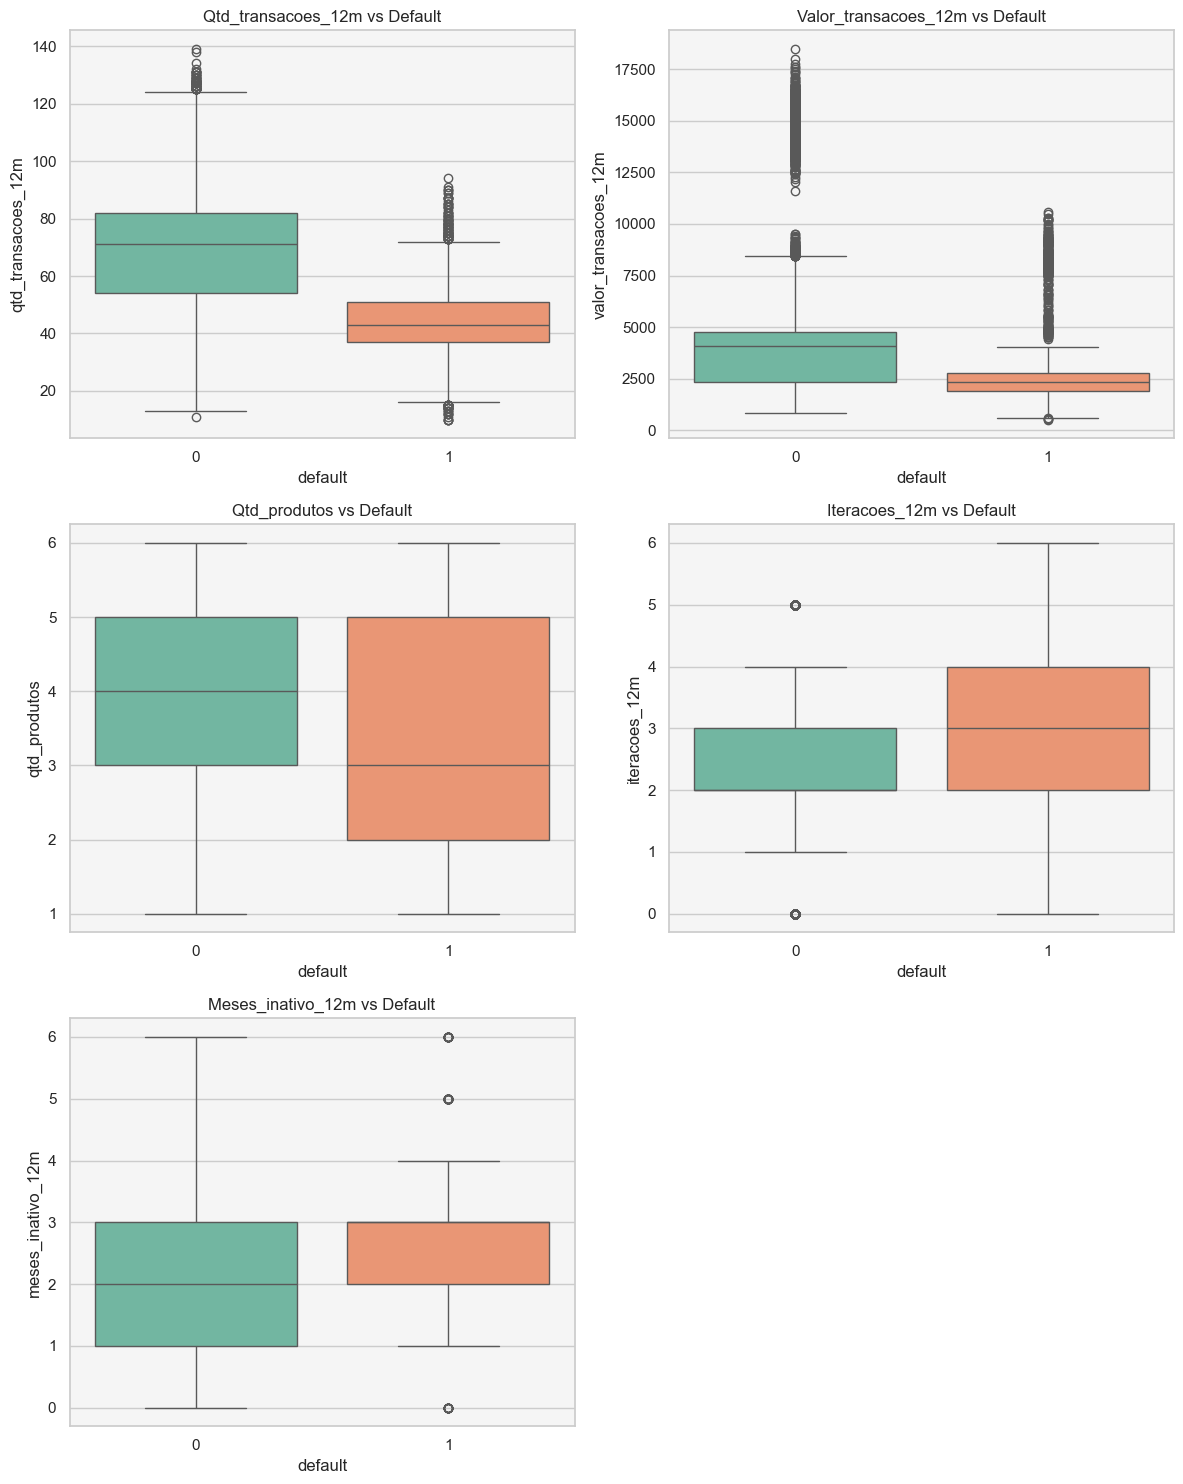

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

df = pd.read_csv('dados_tratados.csv', sep=';')

df['default'] = df['default'].astype(str)

sns.set_theme(style="whitegrid")

# lista de variáveis numéricas para comparar com default
variaveis = ['qtd_transacoes_12m', 'valor_transacoes_12m', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m'] 

# dimensões do grid (automáticas)
n = len(variaveis)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(6 * cols, 5 * rows))

for i, var in enumerate(variaveis, 1):     
    ax = plt.subplot(rows, cols, i)
    
    sns.boxplot(x='default', y=var, hue='default', data=df, palette="Set2", legend=False)
    ax.set_title(f'{var.capitalize()} vs Default')
    # Define a cor de fundo (cinza claro)
    ax.set_facecolor('#f5f5f5')

plt.tight_layout()
plt.show()


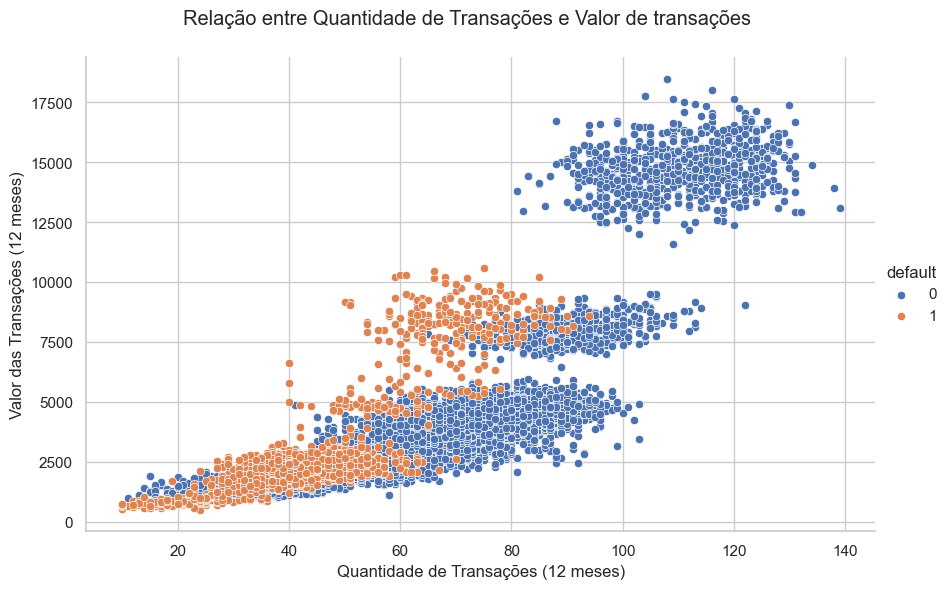

In [25]:
g = sns.FacetGrid(df, hue='default', height=6, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='qtd_transacoes_12m', y='valor_transacoes_12m')

g.add_legend()
plt.subplots_adjust(top=0.9) # espaço entre título e gráfico
g.fig.suptitle('Relação entre Quantidade de Transações e Valor de transações')  
g.set_axis_labels("Quantidade de Transações (12 meses)", "Valor das Transações (12 meses)")

plt.show()

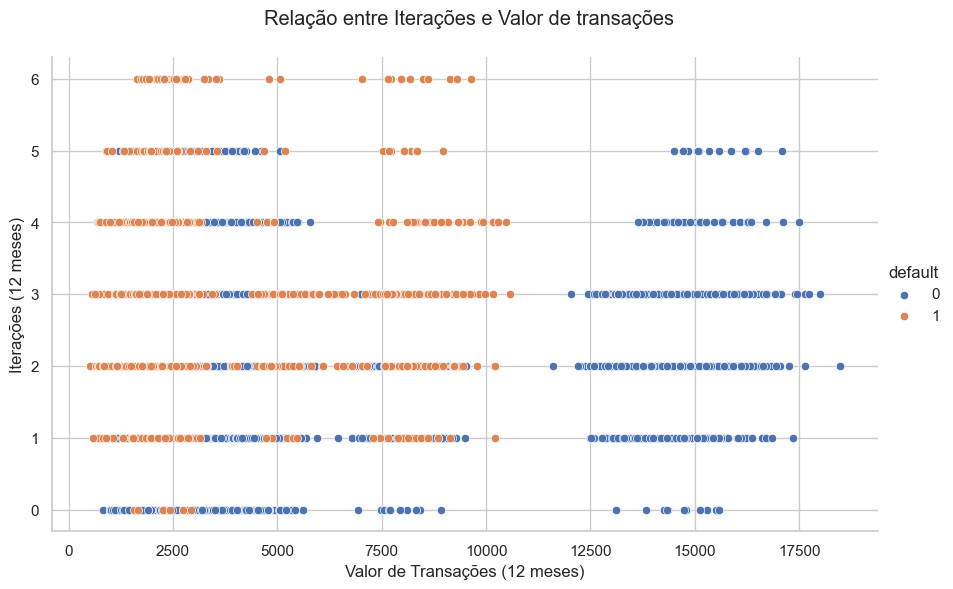

In [29]:
g = sns.FacetGrid(df, hue='default', height=6, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='valor_transacoes_12m', y='iteracoes_12m')

g.add_legend()
plt.subplots_adjust(top=0.9) # espaço entre título e gráfico
g.fig.suptitle('Relação entre Iterações e Valor de transações')  
g.set_axis_labels("Valor de Transações (12 meses)", "Iterações (12 meses)")

plt.show()

## Relatório Gráfico de Fatores de Risco de Inadimplência


### Resultados

A análise dos dados revela que clientes inadimplentes realizam, de forma consistente, menos transações quando comparados aos adimplentes. Além disso, o valor médio dessas transações tende a se concentrar em torno de R$2.500, situando-se próximo ao limite inferior das transações observadas entre os clientes adimplentes.

No que diz respeito ao portfólio de produtos, observa-se que os inadimplentes mantêm uma média de consumo de 3 produtos, enquanto os clientes adimplentes apresentam uma média próxima de 4. Esse dado pode indicar menor engajamento ou diversificação dos serviços contratados pelos inadimplentes.

Um aspecto relevante é o aumento no número de interações realizadas por clientes inadimplentes com os canais da empresa. Apesar dessa maior frequência de contato, tais interações estão associadas a transações de baixo valor, frequentemente totalizando cerca de R$10.000 ao longo de 12 meses. Esse padrão pode refletir tentativas recorrentes de uso com valores reduzidos, caracterizando um perfil de alto engajamento operacional, mas com baixa geração de receita.

Quando associados à inadimplência, esses comportamentos podem representar sinais de risco importantes, demandando atenção em estratégias de monitoramento e prevenção.